In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [2]:
#loading the dataset
train_data=joblib.load('encoded_train_data.joblib',mmap_mode='r')
test_data=joblib.load('encoded_test_data.joblib',mmap_mode='r')

In [3]:
#create X and y
X=train_data.drop('IncidentGrade',axis=1)
y=train_data['IncidentGrade'] 

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_sampled, _, y_sampled, _ = train_test_split(
    X_train, y_train, test_size=0.9, stratify=y_train, random_state=42
)

# Check the original class distribution
print("Original Class Distribution:", Counter(y_sampled))

# Define a corrected sampling strategy
majority_class_size = max(Counter(y_sampled).values())

# Ensure no class is asked for fewer samples than it currently has
sampling_strategy = {
    cls: max(Counter(y_sampled)[cls], int(0.5 * majority_class_size))
    for cls in Counter(y_sampled).keys()
}

# Apply SMOTE with the updated sampling_strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sampled, y_sampled)

# Check the new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))


Original Class Distribution: Counter({0: 306113, 2: 251374, 1: 156337})
Resampled Class Distribution: Counter({0: 306113, 2: 251374, 1: 156337})


In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Original class distribution
print("Original Class Distribution:", Counter(y_sampled))

# Define the sampling strategy to balance minority classes to 90% of the majority class size
majority_class_size = Counter(y_sampled)[0]  # Class 0 is the majority class
target_minority_size = int(0.9 * majority_class_size)  # 90% of the majority class size

sampling_strategy = {
    1: max(Counter(y_sampled)[1], target_minority_size),  # Increase class 1 to target size
    2: max(Counter(y_sampled)[2], target_minority_size)   # Increase class 2 to target size
}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sampled, y_sampled)

# Check the new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))


Original Class Distribution: Counter({0: 306113, 2: 251374, 1: 156337})
Resampled Class Distribution: Counter({0: 306113, 2: 275501, 1: 275501})


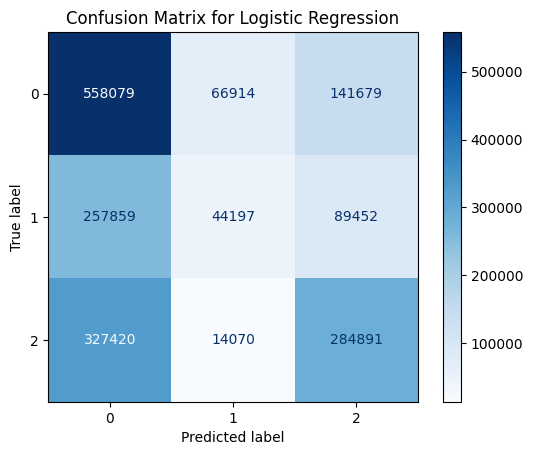

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.49      0.73      0.58    766672
           1       0.35      0.11      0.17    391508
           2       0.55      0.45      0.50    626381

    accuracy                           0.50   1784561
   macro avg       0.46      0.43      0.42   1784561
weighted avg       0.48      0.50      0.46   1784561



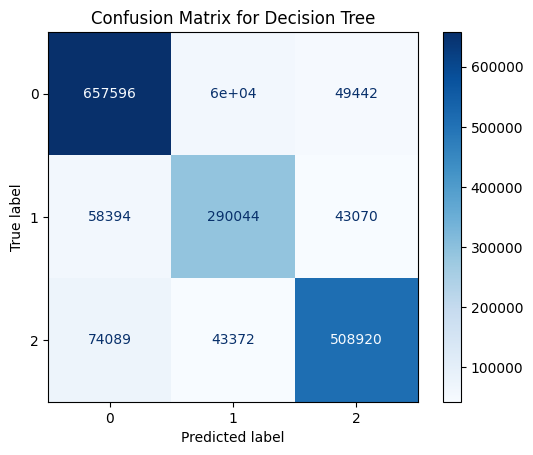

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84    766672
           1       0.74      0.74      0.74    391508
           2       0.85      0.81      0.83    626381

    accuracy                           0.82   1784561
   macro avg       0.81      0.80      0.80   1784561
weighted avg       0.82      0.82      0.82   1784561



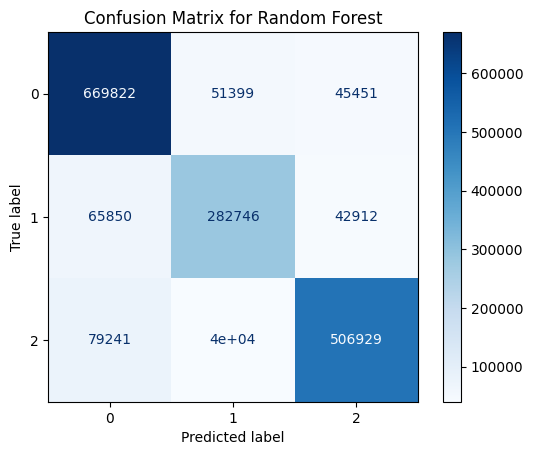

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.87      0.85    766672
           1       0.76      0.72      0.74    391508
           2       0.85      0.81      0.83    626381

    accuracy                           0.82   1784561
   macro avg       0.81      0.80      0.81   1784561
weighted avg       0.82      0.82      0.82   1784561



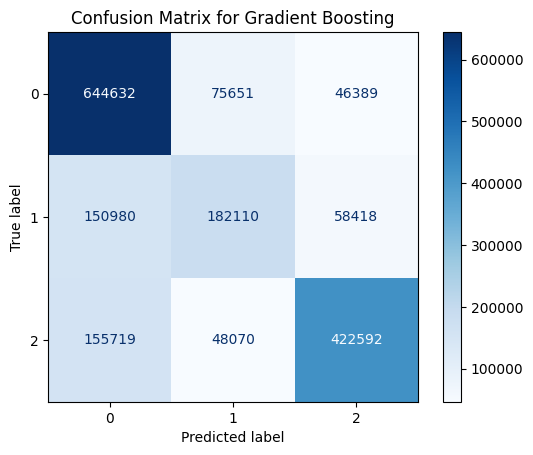

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.68      0.84      0.75    766672
           1       0.60      0.47      0.52    391508
           2       0.80      0.67      0.73    626381

    accuracy                           0.70   1784561
   macro avg       0.69      0.66      0.67   1784561
weighted avg       0.70      0.70      0.69   1784561



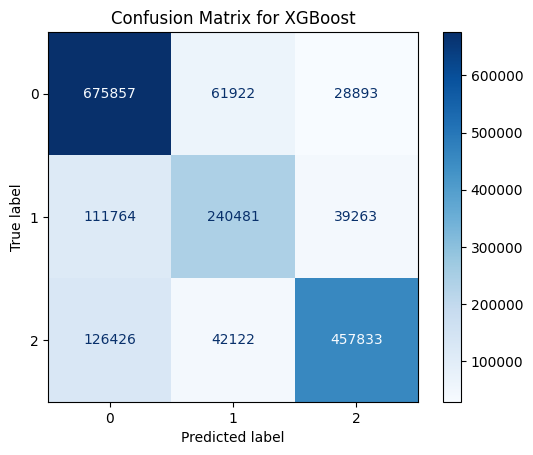

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.74      0.88      0.80    766672
           1       0.70      0.61      0.65    391508
           2       0.87      0.73      0.79    626381

    accuracy                           0.77   1784561
   macro avg       0.77      0.74      0.75   1784561
weighted avg       0.78      0.77      0.77   1784561



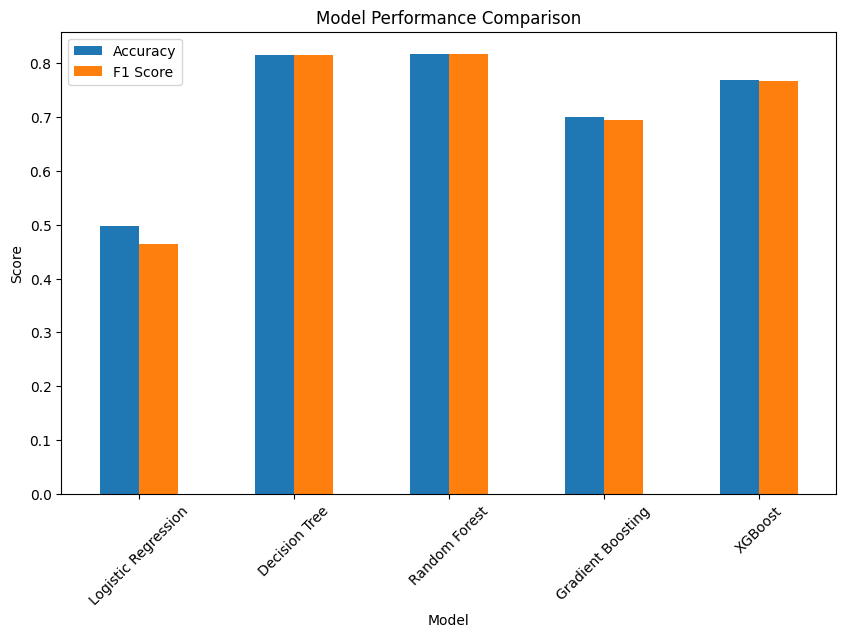

Model Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.497135   0.480938  0.497135  0.463648
1        Decision Tree  0.816201   0.816476  0.816201  0.816136
2        Random Forest  0.817847   0.817722  0.817847  0.817175
3    Gradient Boosting  0.700079   0.702994  0.700079  0.694106
4              XGBoost  0.770033   0.776313  0.770033  0.767777


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    
}

# Initialize a dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the dictionary
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results)

# Plot performance comparison
results_df.plot(x='Model', y=['Accuracy', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

print("Model Comparison:\n", results_df)


Performing RandomizedSearchCV for Random Forest...
Evaluating RandomizedSearchCV Random Forest...


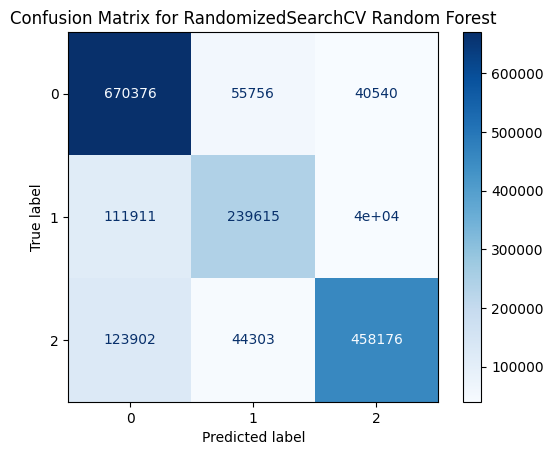

Comparison Metrics DataFrame:
                                Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (RandomizedSearchCV)  0.766669   0.771113  0.766669   0.76418


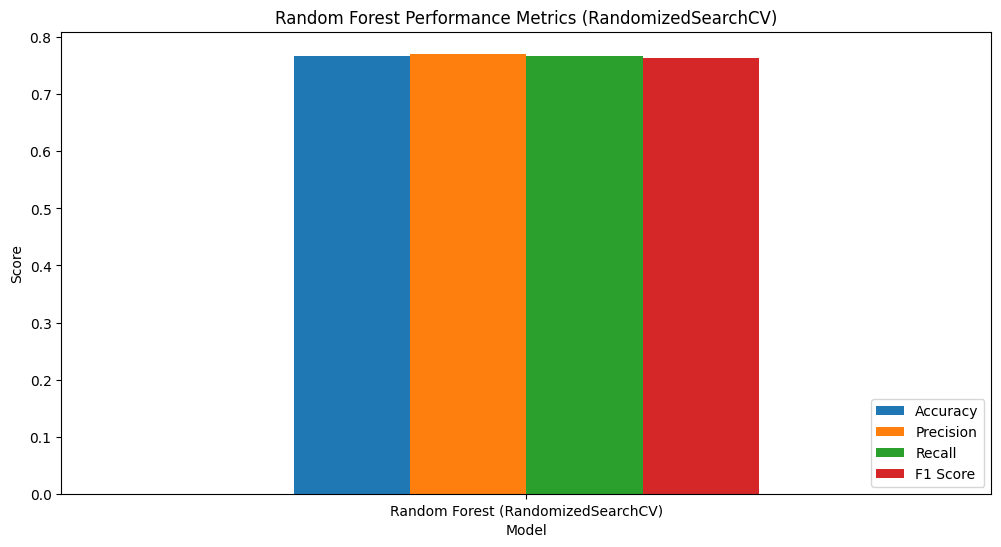

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Sample a subset of data for tuning
X_sampled, _, y_sampled, _ = train_test_split(
    X_resampled, y_resampled, test_size=0.9, stratify=y_resampled, random_state=42
)

# Define parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# RandomizedSearchCV
print("Performing RandomizedSearchCV for Random Forest...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,  # Fewer combinations
    scoring='f1_weighted',
    cv=2,  # Fewer folds
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_sampled, y_sampled)
best_rf = random_search_rf.best_estimator_

# Evaluate RandomizedSearchCV Random Forest
print("Evaluating RandomizedSearchCV Random Forest...")
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for RandomizedSearchCV Random Forest')
plt.show()

# Store metrics in a DataFrame
results = {
    'Model': ['Random Forest (RandomizedSearchCV)'],
    'Accuracy': [accuracy_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1 Score': [f1_rf]
}
results_df = pd.DataFrame(results)

# Print the comparison metrics DataFrame
print("Comparison Metrics DataFrame:")
print(results_df)

# Plot bar plot of metrics
results_df.set_index('Model', inplace=True)  # Set 'Model' as index for cleaner plot
results_df.plot(kind='bar', figsize=(12, 6), legend=True)
plt.title('Random Forest Performance Metrics (RandomizedSearchCV)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [10]:
#saving the model
import joblib

# Save the tuned Random Forest model
joblib.dump(best_rf, 'random_forest_tuned_model.pkl')
print("Tuned Random Forest model saved as 'random_forest_tuned_model.pkl'")


Tuned Random Forest model saved as 'random_forest_tuned_model.pkl'


Evaluation Metrics on Test Data:
Accuracy: 0.7667
Precision: 0.7711
Recall: 0.7667
F1 Score: 0.7642
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80    766672
           1       0.71      0.61      0.66    391508
           2       0.85      0.73      0.79    626381

    accuracy                           0.77   1784561
   macro avg       0.77      0.74      0.75   1784561
weighted avg       0.77      0.77      0.76   1784561



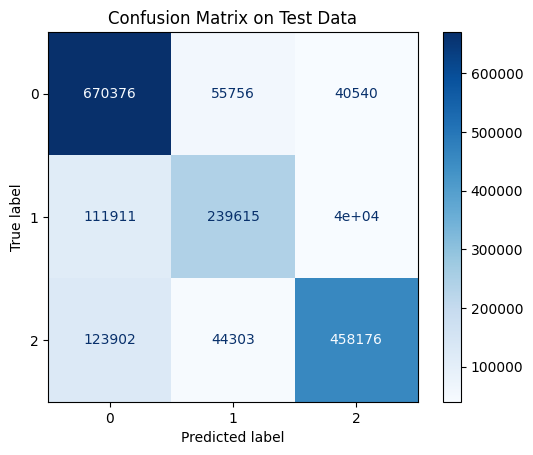

In [11]:

from sklearn.metrics import classification_report
# Evaluate the loaded or trained model
y_pred = best_rf.predict(X_test)

# Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Generate predictions
y_pred = best_rf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Data')
plt.show()


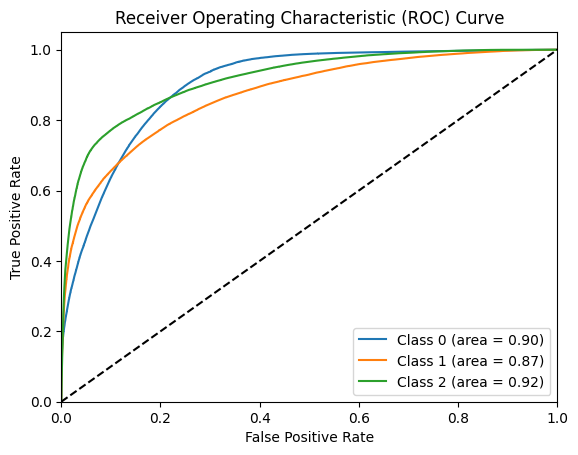

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_prob = best_rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(best_rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(best_rf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()